In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import jax.numpy as jnp
import jax

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


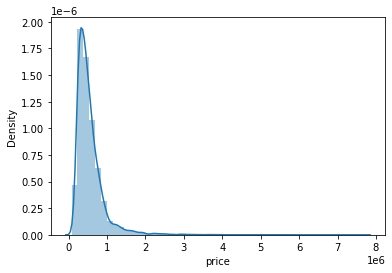

In [ ]:
sns.distplot(data['price'])

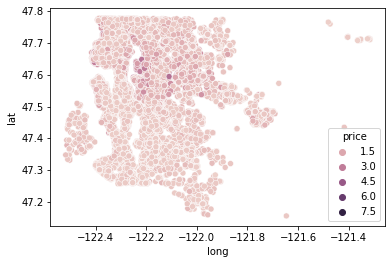

In [ ]:
sns.scatterplot(data = data, x='long' ,y='lat', hue='price')

In [ ]:
data = data[{'bathrooms','sqft_living','condition','bedrooms','lat','long','price','grade'}]
data.corr()

,bathrooms,bedrooms,condition,long,grade,price,lat,sqft_living
bathrooms,1.000000,0.515884,-0.124982,0.223042,0.664983,0.525138,0.024573,0.754665
bedrooms,0.515884,1.000000,0.028472,0.129473,0.356967,0.308350,-0.008931,0.576671
condition,-0.124982,0.028472,1.000000,-0.106500,-0.144674,0.036362,-0.014941,-0.058753
long,0.223042,0.129473,-0.106500,1.000000,0.198372,0.021626,-0.135512,0.240223
grade,0.664983,0.356967,-0.144674,0.198372,1.000000,0.667434,0.114084,0.762704
price,0.525138,0.308350,0.036362,0.021626,0.667434,1.000000,0.307003,0.702035
lat,0.024573,-0.008931,-0.014941,-0.135512,0.114084,0.307003,1.000000,0.052529
sqft_living,0.754665,0.576671,-0.058753,0.240223,0.762704,0.702035,0.052529,1.000000


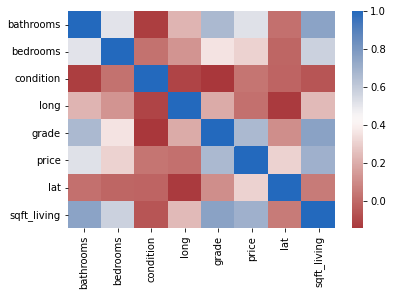

In [ ]:
sns.heatmap(data.corr(), annot = False, cmap = 'vlag_r', )

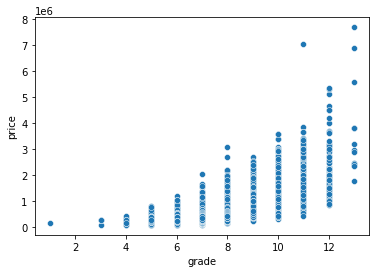

In [ ]:
sns.scatterplot(data = data, x='grade' ,y='price') #we have some relationships

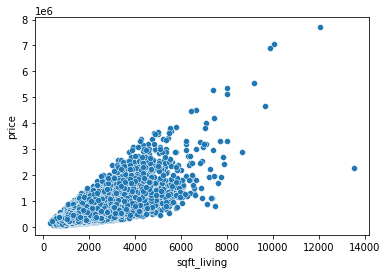

In [ ]:
sns.scatterplot(data = data, x='sqft_living' ,y='price') #we have some relationships

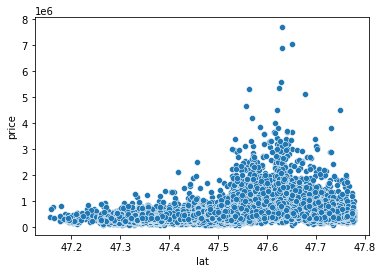

In [ ]:
sns.scatterplot(data = data, x='lat' ,y='price', ) #we have some relationships

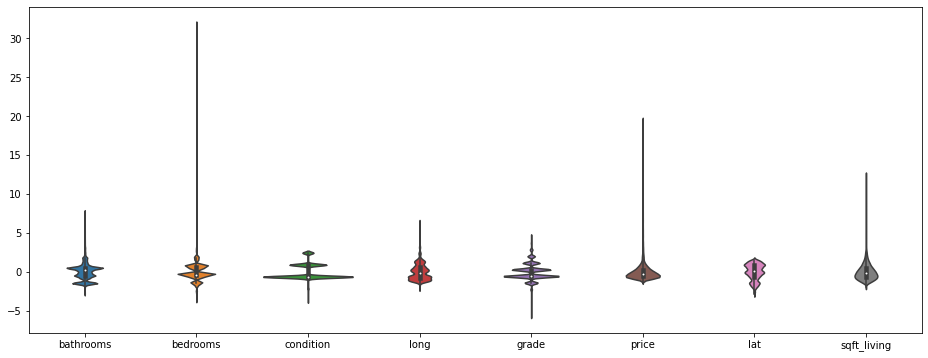

In [ ]:
data = (data - data.mean())/data.std()
_, ax = plt.subplots(figsize=(16,6))
sns.violinplot(data = data, ax = ax)
#we have to normalize the data

In [ ]:
np.random.seed(0)

x = data[{'bathrooms','sqft_living','condition','bedrooms','lat','long','grade'}].to_numpy( )
y = data['price'].to_numpy( )
#np.random.shuffle(dataNP)
num_train = np.random.choice(x.shape[0],15000, replace=False)
x_train = x[num_train, :]
y_train = y[num_train]
x_test = x[[i for i in range(x.shape[0]) if i not in num_train],:]
y_test = y[[i for i in range(x.shape[0]) if i not in num_train]]

x_train.shape, y_train.shape

((15000, 7), (15000,))

In [ ]:
def initialize_params(layers_size):
  np.random.seed(0) # for reproducibility
  params = list()
  for i in range(len(layers_size)-1):
    W = np.random.randn(layers_size[i+1],layers_size[i]) * np.sqrt(2 / (layers_size[i+1] + layers_size[i]))
    b = np.zeros((layers_size[i+1],1))
    params.append(W)
    params.append(b)

  return params


In [ ]:
def ANN(x,params):
  weights = params[0::2]
  biases = params[1::2]
  layer = x.T
  for i in range(len(weights)):
    layer = weights[i] @ layer - biases[i]
    if i < len(weights) - 1 : 
      layer = jnp.tanh(layer)
  return layer.T

ANN(x_train, initialize_params([7,24,24,1])).shape

(15000, 1)

In [ ]:
def loss(x,y,params):
  return jnp.mean((ANN(x,params)-y)**2)
loss(x_train,y_train,initialize_params([7,24,24,1]))

DeviceArray(1.26154, dtype=float32)

  0%|          | 0/10000 [00:00<?, ?it/s]

error: 1.04


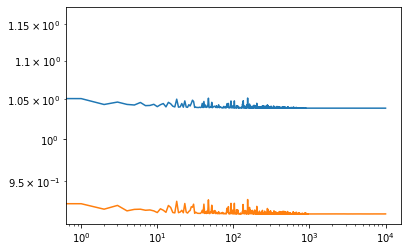

In [ ]:
from tqdm.notebook import tqdm
#hyperparameters
learning_rate=1e-1
lr_min = 5e-4
lr_max = 2e-1
lr_decay = 1000

num_epochs = 10000

batch_size = 1000

grad_jit = jax.jit(jax.grad(loss, argnums=2))
loss_jit = jax.jit(loss)
params = initialize_params([7,14,20,50,20,2,1])

history = [loss_jit(x_train, y_train,params)]
history_valid = [loss_jit(x_test, y_test,params)]

for e in tqdm(range(num_epochs)):
  mini_batch = np.random.choice(x_train.shape[0], batch_size)
  learning_rate = max(lr_min,lr_max*(1-e/lr_decay))
  grads = grad_jit(x_train[mini_batch,:],y_train[mini_batch],params)

  for i in range(len(params)):
    params[i]-= learning_rate*grads[i]
   
  history.append(loss_jit(x_train, y_train,params))
  history_valid.append(loss_jit(x_test,y_test,params))



plt.loglog(history, label = 'training loss')
plt.loglog(history_valid, label = 'validation loss')
print("error: %1.2f" % history[-1])

In [ ]:
print("error: %1.2f" % history_valid[-1])

error: 0.91
